In [1]:
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun  

#### 1.1 Algunas variables

In [2]:
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#### Análisis de la señal P300S04
Se cargan tres señales, una modelo y dos ERPs de pacientes de 29 años, hombres.  
Para el caso del ERPTemplate ahí está la info de los canales.  
Para los archivos P300S04 y P300S07 es distinto.  
El archivo .mat contiene una estructura de datos cuya info importante para éste trabajo es el 'routput'.  


#### 2.1. Revisión de la estructura de datos de P300S04.mat
Son levemente distintas al ERPTemplate.mat  
  
'header' -> Info general del MAT-file.  
'version' -> 1.0.  
'globals' -> Vacío.  
  
'channelRange' -> Un array con los 8 canales. Si los querés tratar, los separás en un df.  
'Fs' > La Fs, frecuencua de muestreo: 250.  
'Trials' -> Sample point where each of the 35 trials starts. (HAY QUE REPASAR ESTO)  
'stims' -> 21482 rows × 3 columns, data.y_stim: Stimulation number: 1-6 rows, 7-12 cols.  
'channelNames' -> Etiqueta de cada uno de los 8 canales: # [FZ]	[CZ] [P3] [PZ] [P4]	[PO7] [PO8]	[OZ]  
'sampleTime' -> 355872 rows × 1 columns, (NO SE QUE ES)  
'samples' -> Acá hay una señal, no es un P300 como tal pero está.  
'Word'  
'data' -> El [0][0][0] lo usa Rodrigo para trabajar mas adelante.

In [3]:
#df_mat4_channelRange = pd.DataFrame(mat4['channelRange'])
#df_mat4_Fs = pd.DataFrame(mat4['Fs'])
#df_mat4_Trials = pd.DataFrame(mat4['Trials'])
#df_mat4_stims = pd.DataFrame(mat4['stims'])
#df_mat4_channelNames = pd.DataFrame(mat4['channelNames'])
#df_mat4_sampleTime = pd.DataFrame(mat4['sampleTime'])
#df_mat4_subject = pd.DataFrame(mat4['subject'])

P300S04 = scipy.io.loadmat('./dataset/P300S04.mat')       

P300S04_samples = pd.DataFrame(P300S04['samples'])
P300S04_samples = P300S04['samples']
P300S04_samples = a_fun.to_df(P300S04_samples)

P300S04_data = pd.DataFrame(P300S04['data'][0][0][0])                          # Es igual -> signal = mat['data'][0][0][0]           
P300S04_data = P300S04['data'][0][0][0]
P300S04_data = a_fun.to_df(P300S04_data)

channelNames = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ','index']
#df_mat4_data.columns = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'] #(OJO, SI LO AGREGO NO HACE EL FOR ABAJO)
#df_mat4_samples.columns = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'P07', 'PO8', 'OZ'] #(OJO, SI LO AGREGO NO HACE EL FOR ABAJO)

In [ ]:
P300S04_samples.head(5)

In [ ]:
P300S04_data.head(5)

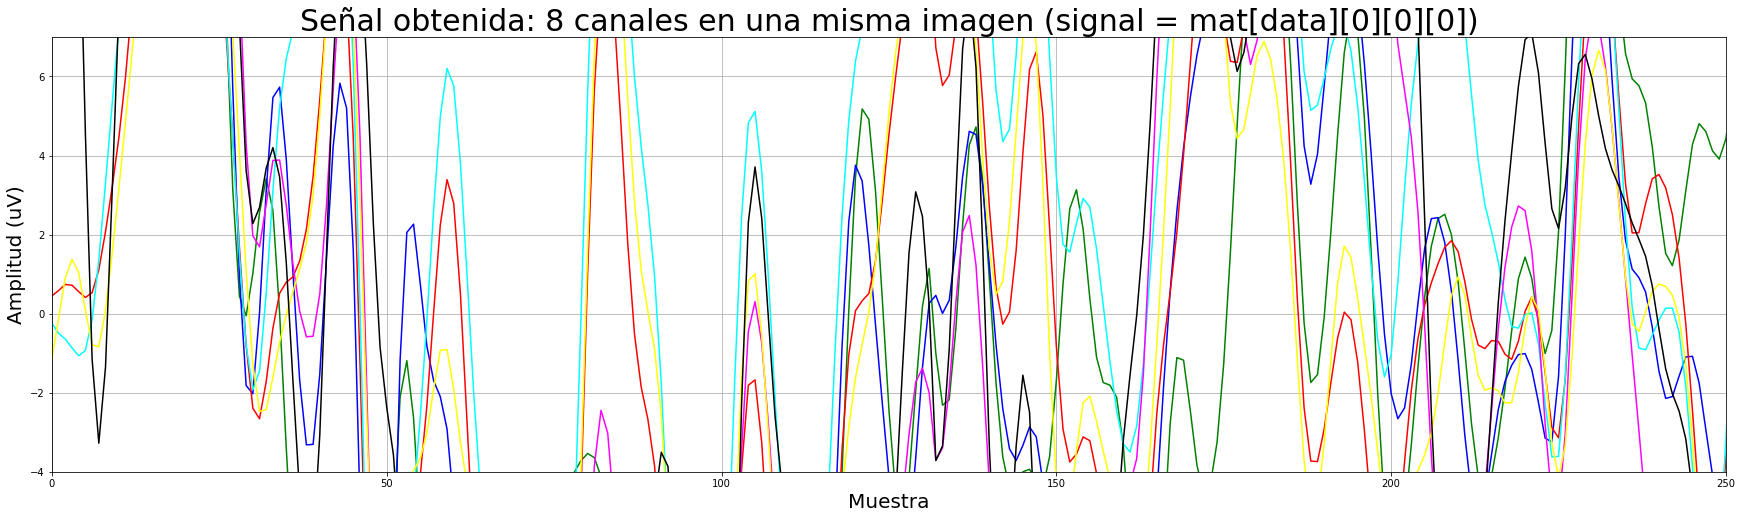

()

In [4]:
data_frame = P300S04_samples

titulo = 'Señal obtenida: 8 canales en una misma imagen (signal = mat[data][0][0][0])'
dir_savefig = "./images_alex/01 - P300S04_8Ch.jpg"
a_fun.grafic_8ch(data_frame, titulo, xlabel, ylabel, dir_savefig)

In [ ]:
data_frame = P300S04_samples

titulo = 'Señal obtenida: 8 canales en una misma imagen (signal = mat[data][0][0][0])'
dir_savefig = "./images_alex/01 - P300S04_8Ch.jpg"
a_fun.grafic_routput(data_frame, titulo, xlabel, ylabel, dir_savefig)

canalFZ = 0
titulo = 'Señal obtenida, canal FZ'
dir_savefig = "./images_alex/02 - P300S04_ChFZ.jpg"
grafico3(data_frame, titulo, xlabel, ylabel, dir_savefig, canalFZ)

canalCZ = 1
titulo = 'Señal obtenida, canal CZ'
dir_savefig = "./images_alex/03- P300S04_ChCZ.jpg"
grafico3(data_frame, titulo, xlabel, ylabel, dir_savefig, canalCZ)

canalP3 = 2
titulo = 'Señal obtenida, canal P3'
dir_savefig = "./images_alex/04- P300S04_ChP3.jpg"
grafico3(data_frame, titulo, xlabel, ylabel, dir_savefig, canalP3)

df_mat4_data.describe()